In [1]:
import pandas as pd

fifa = pd.read_csv('data/international_matches.csv')
fifa.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [3]:
fifa.columns.values

array(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank',
       'away_team_fifa_rank', 'home_team_total_fifa_points',
       'away_team_total_fifa_points', 'home_team_score',
       'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype=object)

In [4]:
fifa['tournament'].unique()

array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'CFU Caribbean Cup qualification',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament', 'Lunar New Year Cup',
       'African Cup of Nations', 'CFU Caribbean Cup',
       'UEFA Euro qualification', 'Kirin Cup', 'FIFA World Cup',
       'Oceania Nations Cup qualification', 'Baltic Cup', 'Gulf Cup',
       'Simba Tournament', 'CECAFA Cup', 'Confederations Cup',
       'Dynasty Cup', "King's Cup", 'Nehru Cup', 'SAFF Cup',
       'Copa Paz del Chaco', 'Korea Cup', 'USA Cup', 'Copa América',
       'Merdeka Tournament', 'South Pacific Games', 'UNCAF Cup',
       'Oceania Nations Cup', 'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'UEFA Euro', 'AFF Championship',
       'AFC Asian Cup', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup',
       'COSAFA Cup qu

In [5]:
fifa = fifa[fifa['tournament'] == 'FIFA World Cup']

<AxesSubplot: >

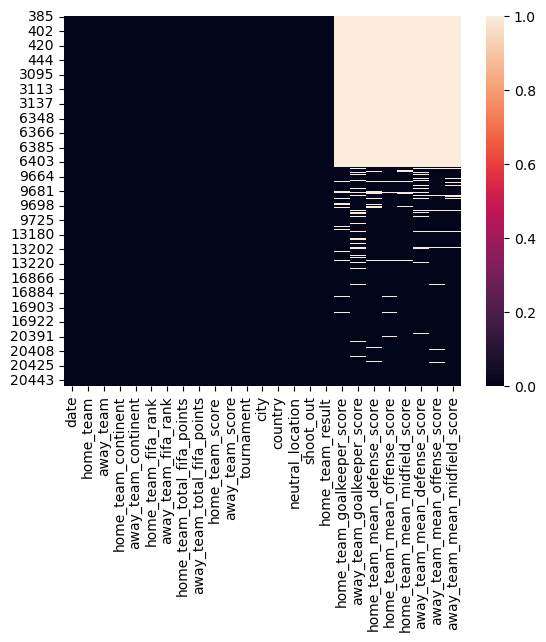

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(fifa.isna())

In [7]:
fifa.dropna(inplace=True)
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 9653 to 20449
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           196 non-null    object 
 1   home_team                      196 non-null    object 
 2   away_team                      196 non-null    object 
 3   home_team_continent            196 non-null    object 
 4   away_team_continent            196 non-null    object 
 5   home_team_fifa_rank            196 non-null    int64  
 6   away_team_fifa_rank            196 non-null    int64  
 7   home_team_total_fifa_points    196 non-null    int64  
 8   away_team_total_fifa_points    196 non-null    int64  
 9   home_team_score                196 non-null    int64  
 10  away_team_score                196 non-null    int64  
 11  tournament                     196 non-null    object 
 12  city                           196 non-null  

In [8]:
fifa.describe().iloc[1:].style.background_gradient(axis=0) 

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
mean,18.770408,19.683673,644.102041,626.693878,1.316327,1.234694,81.158163,79.785714,79.694898,81.556633,81.167347,78.340306,80.188265,79.796429
std,18.991046,16.076163,644.446222,629.223981,1.181888,1.139510,6.593741,6.515071,5.403975,5.493960,4.806092,5.049606,5.426933,4.854798
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,60.000000,64.500000,66.000000,61.200000,64.500000,66.000000,61.200000
25%,5.000000,7.000000,0.000000,0.000000,0.000000,0.000000,76.000000,75.000000,75.200000,77.300000,78.150000,74.500000,76.000000,76.200000
50%,13.000000,15.000000,621.500000,694.500000,1.000000,1.000000,82.000000,80.000000,79.750000,82.700000,81.350000,77.800000,81.000000,79.800000
75%,23.000000,28.000000,1139.500000,1034.000000,2.000000,2.000000,85.000000,84.000000,84.000000,85.300000,85.000000,82.500000,84.300000,83.200000
max,83.000000,78.000000,2164.000000,2164.000000,6.000000,7.000000,95.000000,95.000000,90.200000,92.700000,92.000000,90.200000,91.000000,89.000000


In [9]:
fifa['date'] = pd.to_datetime(fifa['date'])
fifa['year'] = fifa['date'].dt.year

In [10]:
home_teams = fifa.groupby(['home_team', 'home_team_result', 'year'])['date'].count().reset_index()
home_teams

,home_team,home_team_result,year,date
0,Algeria,Draw,2014,1
1,Argentina,Draw,2018,1
2,Argentina,Lose,2010,1
3,Argentina,Lose,2018,1
4,Argentina,Win,2006,3
...,...,...,...,...
136,Uruguay,Lose,2014,1
137,Uruguay,Lose,2018,1
138,Uruguay,Win,2010,2
139,Uruguay,Win,2014,1


In [11]:
wins = home_teams[home_teams['home_team_result'] == 'Win']
wins = wins.sort_values('date', ascending=False)
wins.drop('year', axis=1, inplace=True)
wins.columns = ['home_team', 'home_team_result', 'wins']

wc_totals = wins.groupby('home_team')['home_team_result'].count().reset_index()
wc_totals.columns = ['home_team', 'wc_total']

wins = wins.groupby('home_team').sum().reset_index()
wins = wins.merge(wc_totals)
wins['wins_per_wc'] = wins['wins'] / wins['wc_total']
wins = wins.sort_values('wins_per_wc', ascending=False)
wins.style.background_gradient(axis=0)

/var/folders/tp/jggcpc_97gg_ws1rd9dycpq80000gp/T/ipykernel_20169/1181607335.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wins = wins.groupby('home_team').sum().reset_index()


,home_team,wins,wc_total,wins_per_wc
2,Belgium,6,2,3.000000
19,Russia,3,1,3.000000
5,Colombia,3,1,3.000000
7,Croatia,3,1,3.000000
11,Germany,11,4,2.750000
0,Argentina,8,3,2.666667
10,France,5,2,2.500000
3,Brazil,10,4,2.500000
16,Netherlands,7,3,2.333333
13,Italy,2,1,2.000000


In [12]:
wins.to_csv('data/wins_per_wc.csv', index=False)

---

## Merge it Together

In [13]:
fifa = pd.read_csv('data/international_matches.csv', parse_dates=['date'])
fifa.dropna(axis=1, inplace=True) # drop excess cols
fifa

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,1,UEFA Nations League,Chișinău,Moldova,False,No,Win
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,2,UEFA Nations League,Vaduz,Liechtenstein,False,No,Lose
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,0,Kirin Cup,Suita,Japan,True,Yes,Lose
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,3,Kirin Cup,Suita,Japan,False,No,Lose


In [14]:
fifa.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result'],
      dtype='object')

In [15]:
keep_cols = 'date home_team away_team home_team_continent away_team_continent tournament neutral_location home_team_result'.split()
fifa = fifa[keep_cols] # reduce num of cols
fifa

,date,home_team,away_team,home_team_continent,away_team_continent,tournament,neutral_location,home_team_result
0,1993-08-08,Bolivia,Uruguay,South America,South America,FIFA World Cup qualification,False,Win
1,1993-08-08,Brazil,Mexico,South America,North America,Friendly,False,Draw
2,1993-08-08,Ecuador,Venezuela,South America,South America,FIFA World Cup qualification,False,Win
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,Friendly,False,Win
4,1993-08-08,Paraguay,Argentina,South America,South America,FIFA World Cup qualification,False,Lose
...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,UEFA Nations League,False,Win
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,UEFA Nations League,False,Lose
23918,2022-06-14,Chile,Ghana,South America,Africa,Kirin Cup,True,Lose
23919,2022-06-14,Japan,Tunisia,Asia,Africa,Kirin Cup,False,Lose


In [16]:
fifa = fifa[fifa['home_team_result'] != 'Draw'] # remove draws
fifa

,date,home_team,away_team,home_team_continent,away_team_continent,tournament,neutral_location,home_team_result
0,1993-08-08,Bolivia,Uruguay,South America,South America,FIFA World Cup qualification,False,Win
2,1993-08-08,Ecuador,Venezuela,South America,South America,FIFA World Cup qualification,False,Win
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,Friendly,False,Win
4,1993-08-08,Paraguay,Argentina,South America,South America,FIFA World Cup qualification,False,Lose
5,1993-08-08,Peru,Colombia,South America,South America,FIFA World Cup qualification,False,Lose
...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,UEFA Nations League,False,Win
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,UEFA Nations League,False,Lose
23918,2022-06-14,Chile,Ghana,South America,Africa,Kirin Cup,True,Lose
23919,2022-06-14,Japan,Tunisia,Asia,Africa,Kirin Cup,False,Lose


In [17]:
# create winner columns for easy aggs
def winner(row):
    if row['home_team_result'] == 'Win':
        return row['home_team']
    else:
        return row['away_team']

fifa['winner'] = fifa.apply(winner, axis=1)
fifa

/var/folders/tp/jggcpc_97gg_ws1rd9dycpq80000gp/T/ipykernel_20169/2301542638.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa['winner'] = fifa.apply(winner, axis=1)


,date,home_team,away_team,home_team_continent,away_team_continent,tournament,neutral_location,home_team_result,winner
0,1993-08-08,Bolivia,Uruguay,South America,South America,FIFA World Cup qualification,False,Win,Bolivia
2,1993-08-08,Ecuador,Venezuela,South America,South America,FIFA World Cup qualification,False,Win,Ecuador
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,Friendly,False,Win,Guinea
4,1993-08-08,Paraguay,Argentina,South America,South America,FIFA World Cup qualification,False,Lose,Argentina
5,1993-08-08,Peru,Colombia,South America,South America,FIFA World Cup qualification,False,Lose,Colombia
...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,UEFA Nations League,False,Win,Moldova
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,UEFA Nations League,False,Lose,Latvia
23918,2022-06-14,Chile,Ghana,South America,Africa,Kirin Cup,True,Lose,Ghana
23919,2022-06-14,Japan,Tunisia,Asia,Africa,Kirin Cup,False,Lose,Tunisia


In [18]:
# create winning continent col
def winner_continent(row):
    if row['home_team_result'] == 'Win':
        return row['home_team_continent']
    else:
        return row['away_team_continent']

fifa['winner_continent'] = fifa.apply(winner_continent, axis=1)
fifa

/var/folders/tp/jggcpc_97gg_ws1rd9dycpq80000gp/T/ipykernel_20169/3325322740.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa['winner_continent'] = fifa.apply(winner_continent, axis=1)


,date,home_team,away_team,home_team_continent,away_team_continent,tournament,neutral_location,home_team_result,winner,winner_continent
0,1993-08-08,Bolivia,Uruguay,South America,South America,FIFA World Cup qualification,False,Win,Bolivia,South America
2,1993-08-08,Ecuador,Venezuela,South America,South America,FIFA World Cup qualification,False,Win,Ecuador,South America
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,Friendly,False,Win,Guinea,Africa
4,1993-08-08,Paraguay,Argentina,South America,South America,FIFA World Cup qualification,False,Lose,Argentina,South America
5,1993-08-08,Peru,Colombia,South America,South America,FIFA World Cup qualification,False,Lose,Colombia,South America
...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,UEFA Nations League,False,Win,Moldova,Europe
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,UEFA Nations League,False,Lose,Latvia,Europe
23918,2022-06-14,Chile,Ghana,South America,Africa,Kirin Cup,True,Lose,Ghana,Africa
23919,2022-06-14,Japan,Tunisia,Asia,Africa,Kirin Cup,False,Lose,Tunisia,Africa


In [19]:
# see who has won most
fifa['winner'].value_counts().iloc[:10]

Brazil            301
Mexico            272
Spain             246
USA               242
Germany           240
Saudi Arabia      238
France            230
Japan             227
IR Iran           217
Korea Republic    217
Name: winner, dtype: int64

In [20]:
# see who lost most
fifa['winner'].value_counts().iloc[-10:]

Timor-Leste                 5
US Virgin Islands           5
Somalia                     5
Turks and Caicos Islands    5
Cook Islands                5
Gibraltar                   5
Djibouti                    4
American Samoa              4
Anguilla                    2
San Marino                  1
Name: winner, dtype: int64

In [21]:
# see winning continents
fifa['winner_continent'].value_counts().iloc[:10]

Europe           5952
Africa           4455
Asia             3871
North America    2069
South America    1719
Oceania           466
Name: winner_continent, dtype: int64

---

In [22]:
# read in happiness data
happy = pd.read_csv('data/hapiscore_whr.csv')
happy.head()

,country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,NaN,NaN,NaN,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,23.8,NaN,24.0
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,55.9,43.6,39.4,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,46.3,NaN,54.9,52.7,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,50.0,53.6,52.0
3,United Arab Emirates,NaN,67.3,NaN,NaN,68.7,71.0,71.2,72.2,66.2,65.4,65.7,68.3,70.4,66.0,67.1,64.6,65.8
4,Argentina,NaN,63.1,60.7,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,60.9,59.0,59.7


In [23]:
# change the format
happy = happy.melt(id_vars=('country'), var_name='year', value_name='happiness')
happy

,country,year,happiness
0,Afghanistan,2004,NaN
1,Angola,2004,NaN
2,Albania,2004,NaN
3,United Arab Emirates,2004,NaN
4,Argentina,2004,NaN
...,...,...,...
2766,Vietnam,2020,54.9
2767,Yemen,2020,42.0
2768,South Africa,2020,51.9
2769,Zambia,2020,37.6


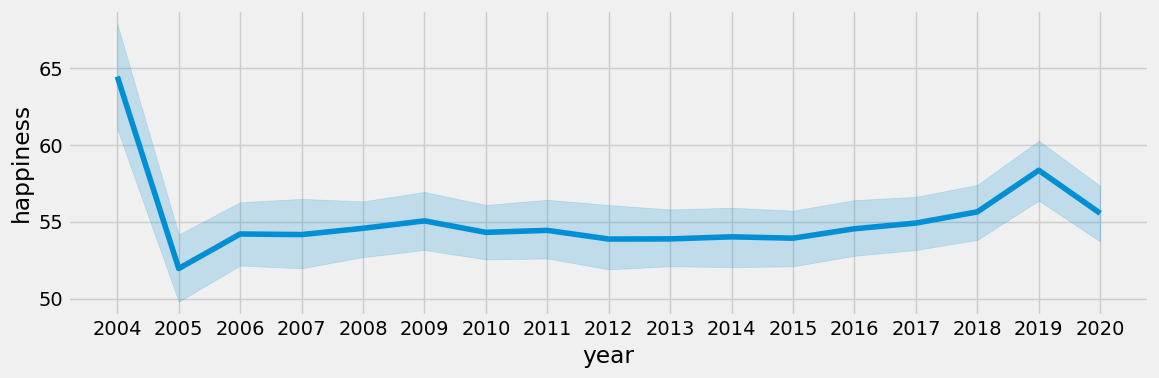

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
# plot world happiness for fun
plt.figure(figsize=(12,4))
sns.lineplot(data=happy, x='year', y='happiness')
plt.tight_layout()

In [25]:
# order countries by mean happiness over time
food_grouped = happy.groupby('country')['happiness'].mean().sort_values(ascending=False).reset_index()
food_grouped

,country,happiness
0,Denmark,76.775000
1,Finland,76.128571
2,Switzerland,75.445455
3,Norway,74.990909
4,Netherlands,74.620000
...,...,...
158,Togo,36.110000
159,Burundi,35.500000
160,Central African Republic,35.160000
161,Afghanistan,35.015385


/var/folders/tp/jggcpc_97gg_ws1rd9dycpq80000gp/T/ipykernel_20169/3321900863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10['Category'] = 'Happiest'
/var/folders/tp/jggcpc_97gg_ws1rd9dycpq80000gp/T/ipykernel_20169/3321900863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_10['Category'] = 'Unhappiest'
/var/folders/tp/jggcpc_97gg_ws1rd9dycpq80000gp/T/ipykernel_20169/3321900863.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future versio

,happiness
Category,
Happiest,74.560160
Unhappiest,36.572038


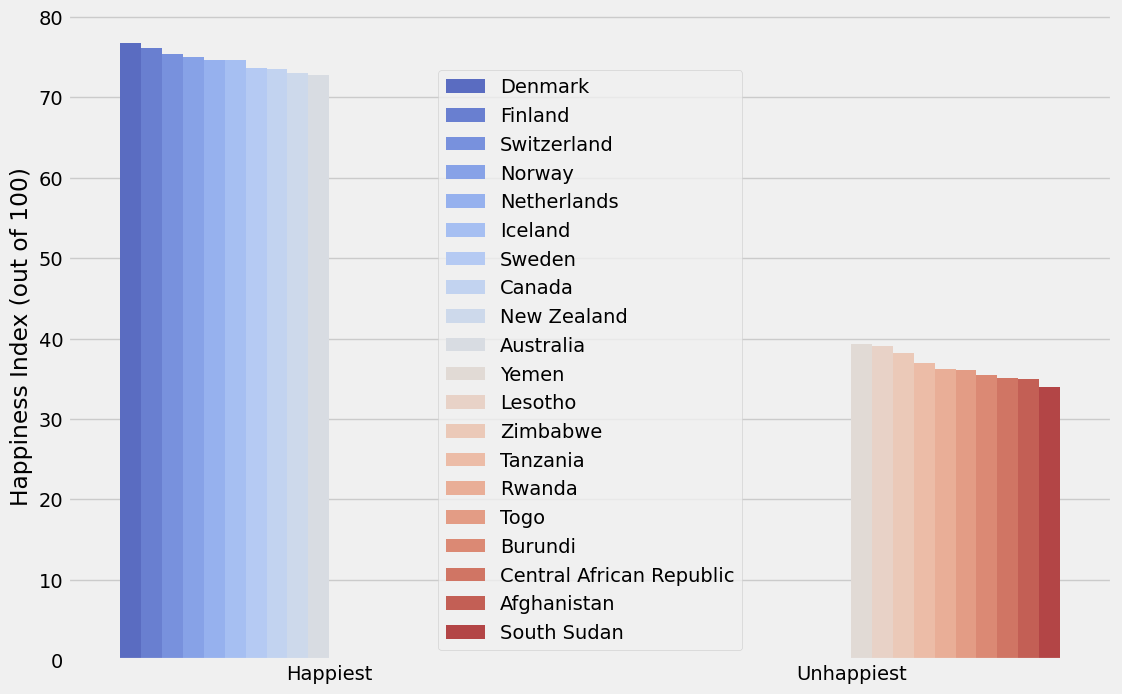

In [26]:
# show the happiness rating of top 10 moist happy against top 10 unhappy
top_10 = happiest.iloc[:10]
top_10['Category'] = 'Happiest'
bot_10 = happiest.iloc[-10:]
bot_10['Category'] = 'Unhappiest'
com_10 = pd.concat([top_10, bot_10])

plt.figure(figsize=(12,8))
sns.barplot(data=com_10, x='Category', y='happiness', hue='country', palette='coolwarm')
plt.legend(title=None)
plt.xlabel(None)
plt.ylabel('Happiness Index (out of 100)')
com_10.groupby('Category').mean()

In [29]:
import country_converter as coco
# normalize country names for merge
winner_names = coco.convert(fifa['winner'], to='name_short')
fifa['winner'] = winner_names
# group uk teams into one to merge with happy data
def uk_fixer(row):
    uk_list = ['England', 'Wales', 'Northern Ireland', 'Scotland']
    if row['winner'] in uk_list:
        return 'United Kingdom'
    else:
        return row['winner']

fifa['winner'] = fifa.apply(uk_fixer, axis=1)
country_names = coco.convert(happy['country'], to='name_short')
happy['country'] = country_names


not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not found in regex
not found not 

In [35]:
# merge the two sets
# add year col to fifa
fifa['year'] = fifa['date'].dt.year
# convert year to number on happy
happy['year'] = happy['year'].astype(int)
fifa_happy = fifa.merge(happy, left_on=['winner', 'year'], right_on=['country', 'year'])
fifa_happy

/var/folders/tp/jggcpc_97gg_ws1rd9dycpq80000gp/T/ipykernel_20169/2432601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa['year'] = fifa['date'].dt.year


,date,home_team,away_team,home_team_continent,away_team_continent,tournament,neutral_location,home_team_result,winner,winner_continent,year,country,happiness
0,2004-01-01,Bahrain,Saudi Arabia,Asia,Asia,Gulf Cup,True,Lose,Saudi Arabia,Asia,2004,Saudi Arabia,70.8
1,2004-01-06,Oman,Saudi Arabia,Asia,Asia,Gulf Cup,True,Lose,Saudi Arabia,Asia,2004,Saudi Arabia,70.8
2,2004-01-08,Yemen,Saudi Arabia,Asia,Asia,Gulf Cup,True,Lose,Saudi Arabia,Asia,2004,Saudi Arabia,70.8
3,2004-02-18,Saudi Arabia,Indonesia,Asia,Asia,FIFA World Cup qualification,False,Win,Saudi Arabia,Asia,2004,Saudi Arabia,70.8
4,2004-03-31,Sri Lanka,Saudi Arabia,Asia,Asia,FIFA World Cup qualification,False,Lose,Saudi Arabia,Asia,2004,Saudi Arabia,70.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10349,2020-11-17,Korea Republic,Qatar,Asia,Asia,Friendly,True,Win,South Korea,Asia,2020,South Korea,59.4
10350,2020-11-17,Saudi Arabia,Jamaica,Asia,North America,Friendly,False,Lose,Jamaica,North America,2020,Jamaica,58.5
10351,2020-11-17,Uzbekistan,Iraq,Asia,Asia,Friendly,True,Lose,Iraq,Asia,2020,Iraq,49.4
10352,2020-11-17,Venezuela,Chile,South America,South America,FIFA World Cup qualification,False,Win,Venezuela,South America,2020,Venezuela,49.3


In [102]:
# need win loss ratio
homes = fifa_happy['home_team'].value_counts().reset_index()
homes.columns = ['Country', 'Home Games']
aways = fifa_happy['away_team'].value_counts().reset_index()
aways.columns = ['Country', 'Away Games']
games = homes.merge(aways)
games['Total'] = games['Home Games'] + games['Away Games']
games

,Country,Home Games,Away Games,Total
0,Mexico,147,88,235
1,USA,143,66,209
2,Japan,135,76,211
3,Qatar,123,71,194
4,Egypt,113,57,170
...,...,...,...,...
201,St. Vincent and the Grenadines,3,3,6
202,Turks and Caicos Islands,2,4,6
203,Papua New Guinea,2,4,6
204,Tahiti,2,5,7


In [50]:
# group by winner and year to get count of wins and hapiness for the year
year_group = fifa_happy.groupby(['winner', 'year'])['happiness'].agg(['mean', 'count']).reset_index()
year_group.columns = ['Country', 'Year', 'Happiness', 'Wins']
year_group

,Country,Year,Happiness,Wins
0,Afghanistan,2005,NaN,0
1,Afghanistan,2008,44.0,1
2,Afghanistan,2011,37.8,6
3,Afghanistan,2013,31.3,6
4,Afghanistan,2014,39.8,2
...,...,...,...,...
2346,Zimbabwe,2015,37.4,5
2347,Zimbabwe,2016,36.4,5
2348,Zimbabwe,2017,36.2,7
2349,Zimbabwe,2018,26.9,3


<AxesSubplot: xlabel='Wins', ylabel='Happiness'>

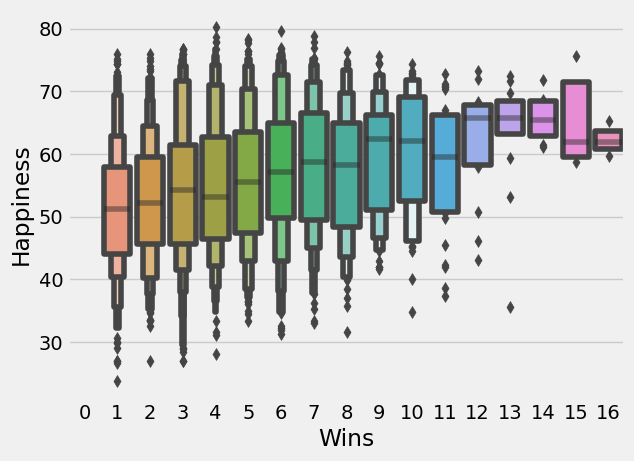

In [58]:
# plot wins over happiness
sns.boxenplot(data=year_group, x='Wins', y='Happiness')

In [98]:
# get the winning countries
happy_wins = year_group.groupby('Country')[['Happiness', 'Wins']].agg(['mean', 'sum']).reset_index()
happy_wins.columns = happy_wins.columns.get_level_values(0)
happy_wins = happy_wins.iloc[:,[0, 1, 4]]
happy_wins

,Country,Happiness,Wins
0,Afghanistan,34.050000,26
1,Albania,50.321429,43
2,Algeria,53.588889,38
3,Angola,44.225000,17
4,Argentina,62.887500,119
...,...,...,...
157,Venezuela,59.780000,56
158,Vietnam,53.291667,47
159,Yemen,38.930000,21
160,Zambia,44.986667,96


In [105]:
# merge with total games
happy_wins = happy_wins.merge(games)

In [107]:
# create ratio col
happy_wins['Win Ratio'] = happy_wins['Wins'] / happy_wins['Total']
happy_wins

,Country,Happiness,Wins,Home Games,Away Games,Total,Win Ratio
0,Afghanistan,34.050000,26,26,39,65,0.400000
1,Albania,50.321429,43,67,48,115,0.373913
2,Algeria,53.588889,38,78,51,129,0.294574
3,Angola,44.225000,17,64,63,127,0.133858
4,Argentina,62.887500,119,97,81,178,0.668539
...,...,...,...,...,...,...,...
147,Venezuela,59.780000,56,61,77,138,0.405797
148,Vietnam,53.291667,47,58,41,99,0.474747
149,Yemen,38.930000,21,51,57,108,0.194444
150,Zambia,44.986667,96,81,101,182,0.527473


<AxesSubplot: xlabel='Win Ratio', ylabel='Happiness'>

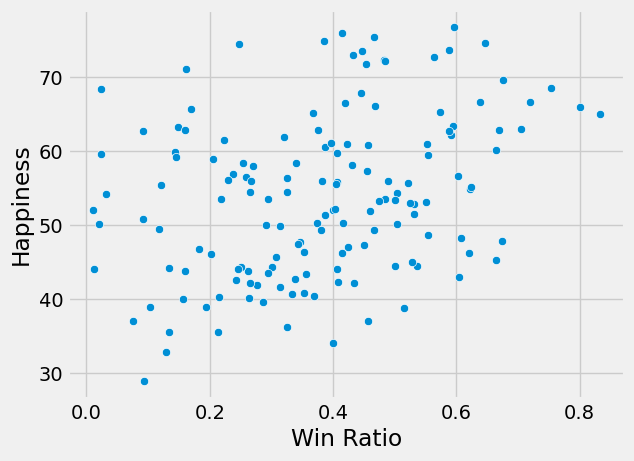

In [110]:
sns.scatterplot(happy_wins, x='Win Ratio', y='Happiness')

In [162]:
happy_wins = happy_wins[['Country', 'Happiness', 'Win Ratio']]
happy_wins

,Country,Happiness,Win Ratio
0,Afghanistan,34.050000,0.400000
1,Albania,50.321429,0.373913
2,Algeria,53.588889,0.294574
3,Angola,44.225000,0.133858
4,Argentina,62.887500,0.668539
...,...,...,...
147,Venezuela,59.780000,0.405797
148,Vietnam,53.291667,0.474747
149,Yemen,38.930000,0.194444
150,Zambia,44.986667,0.527473


---

In [170]:
food = pd.read_csv('data/food_supply_kilocalories_per_person_and_day.csv')
food

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,3000.0,2920.0,2700.0,2950.0,2960.0,2740.0,2970.0,2920.0,2940.0,...,2080.0,2100.0,2110.0,2100.0,2090.0,2100.0,2040.0,2030.0,2050.0,2040.0
1,Angola,1800.0,1820.0,1850.0,1860.0,1880.0,1890.0,1920.0,1860.0,1950.0,...,2300.0,2350.0,2410.0,2380.0,2470.0,2420.0,2380.0,2340.0,2370.0,2390.0
2,Albania,2220.0,2240.0,2160.0,2270.0,2250.0,2250.0,2260.0,2340.0,2400.0,...,2990.0,3080.0,3130.0,3180.0,3190.0,3270.0,3280.0,3380.0,3390.0,3360.0
3,Netherlands Antilles,2950.0,3060.0,3130.0,3140.0,3110.0,3050.0,3110.0,3180.0,3150.0,...,3100.0,3110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,2890.0,2780.0,2740.0,2620.0,2590.0,2690.0,2770.0,2930.0,2940.0,...,3170.0,3160.0,3210.0,3230.0,3280.0,3400.0,3410.0,3370.0,3340.0,3310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Yemen,1790.0,1800.0,1820.0,1830.0,1840.0,1850.0,1850.0,1840.0,1860.0,...,2160.0,2200.0,2210.0,2230.0,2220.0,2160.0,2170.0,2010.0,2070.0,2150.0
175,Yugoslavia,3050.0,3190.0,3210.0,3290.0,3290.0,3400.0,3430.0,3400.0,3420.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,South Africa,2670.0,2620.0,2730.0,2760.0,2860.0,2760.0,2700.0,2750.0,2790.0,...,2940.0,2990.0,3000.0,3010.0,3020.0,2980.0,2940.0,2920.0,2940.0,2900.0
177,Zambia,2160.0,2150.0,2110.0,2060.0,2040.0,2180.0,2200.0,2230.0,2250.0,...,1880.0,1900.0,1910.0,1920.0,1930.0,2010.0,2030.0,1990.0,1990.0,2000.0


In [171]:
# change the format
food = food.melt(id_vars=('country'), var_name='year', value_name='food')
food['year'] = food['year'].astype(int)
food

,country,year,food
0,Afghanistan,1960,3000.0
1,Angola,1960,1800.0
2,Albania,1960,2220.0
3,Netherlands Antilles,1960,2950.0
4,United Arab Emirates,1960,2890.0
...,...,...,...
10377,Yemen,2017,2150.0
10378,Yugoslavia,2017,NaN
10379,South Africa,2017,2900.0
10380,Zambia,2017,2000.0


In [172]:
food = food[food['year']>=2004]
food

,country,year,food
7876,Afghanistan,2004,1950.0
7877,Angola,2004,2080.0
7878,Albania,2004,2870.0
7879,Netherlands Antilles,2004,3090.0
7880,United Arab Emirates,2004,3210.0
...,...,...,...
10377,Yemen,2017,2150.0
10378,Yugoslavia,2017,NaN
10379,South Africa,2017,2900.0
10380,Zambia,2017,2000.0


In [173]:
country_names = coco.convert(food['country'], to='name_short')
food['country'] = country_names
food

Netherlands Antilles not found in regex
Serbia and Montenegro not found in regex
USSR not found in regex
Yugoslavia not found in regex
Netherlands Antilles not found in regex
Serbia and Montenegro not found in regex
USSR not found in regex
Yugoslavia not found in regex
Netherlands Antilles not found in regex
Serbia and Montenegro not found in regex
USSR not found in regex
Yugoslavia not found in regex
Netherlands Antilles not found in regex
Serbia and Montenegro not found in regex
USSR not found in regex
Yugoslavia not found in regex
Netherlands Antilles not found in regex
Serbia and Montenegro not found in regex
USSR not found in regex
Yugoslavia not found in regex
Netherlands Antilles not found in regex
Serbia and Montenegro not found in regex
USSR not found in regex
Yugoslavia not found in regex
Netherlands Antilles not found in regex
Serbia and Montenegro not found in regex
USSR not found in regex
Yugoslavia not found in regex
Netherlands Antilles not found in regex
Serbia and Mont

,country,year,food
7876,Afghanistan,2004,1950.0
7877,Angola,2004,2080.0
7878,Albania,2004,2870.0
7879,not found,2004,3090.0
7880,United Arab Emirates,2004,3210.0
...,...,...,...
10377,Yemen,2017,2150.0
10378,not found,2017,NaN
10379,South Africa,2017,2900.0
10380,Zambia,2017,2000.0


In [174]:
food = food[food['country'] != 'not found']
food

,country,year,food
7876,Afghanistan,2004,1950.0
7877,Angola,2004,2080.0
7878,Albania,2004,2870.0
7880,United Arab Emirates,2004,3210.0
7881,Argentina,2004,3110.0
...,...,...,...
10376,Samoa,2017,3030.0
10377,Yemen,2017,2150.0
10379,South Africa,2017,2900.0
10380,Zambia,2017,2000.0


In [178]:
food_grouped = food.groupby('country')['food'].mean().sort_values(ascending=False).reset_index()
food_grouped

,country,food
0,Belgium,3737.857143
1,United States,3726.428571
2,Austria,3706.428571
3,Türkiye,3667.857143
4,Ireland,3636.428571
...,...,...
169,Zimbabwe,2055.000000
170,Afghanistan,2053.571429
171,Madagascar,2025.000000
172,Central African Republic,1969.285714


/var/folders/tp/jggcpc_97gg_ws1rd9dycpq80000gp/T/ipykernel_20169/3066300047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10['Category'] = 'More Fed'
/var/folders/tp/jggcpc_97gg_ws1rd9dycpq80000gp/T/ipykernel_20169/3066300047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_10['Category'] = 'Less Fed'
/var/folders/tp/jggcpc_97gg_ws1rd9dycpq80000gp/T/ipykernel_20169/3066300047.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version,

,food
Category,
Less Fed,2050.142857
More Fed,3611.428571


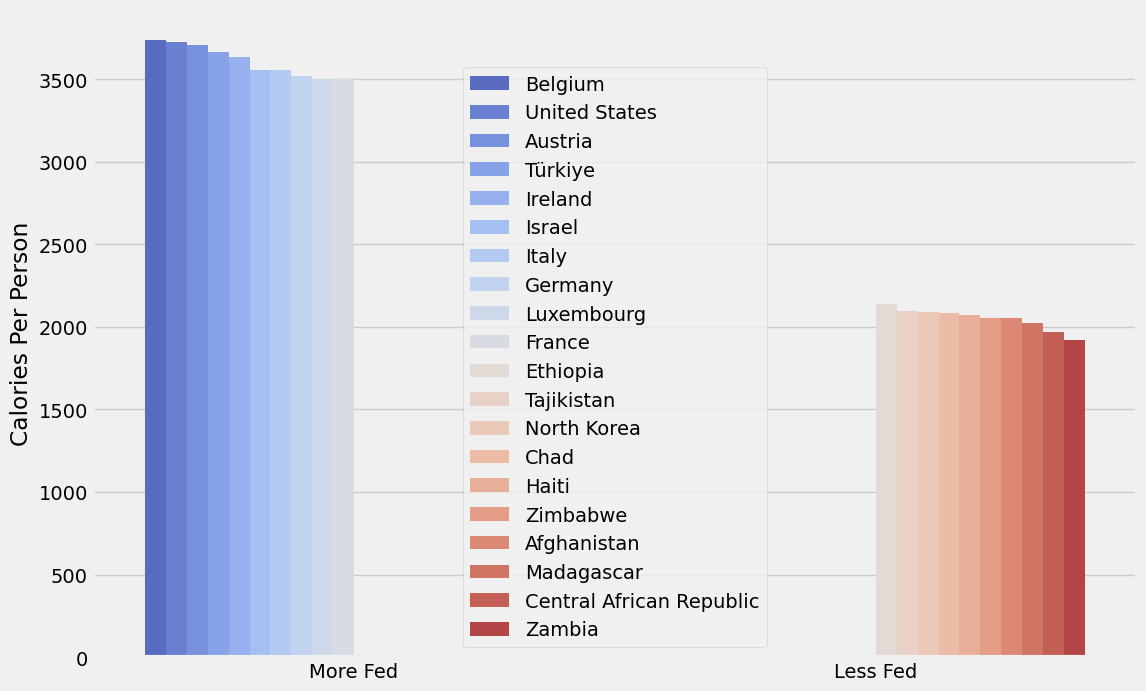

In [180]:
# show the happiness rating of top 10 moist happy against top 10 unhappy
top_10 = food_grouped.iloc[:10]
top_10['Category'] = 'More Fed'
bot_10 = food_grouped.iloc[-10:]
bot_10['Category'] = 'Less Fed'
com_10 = pd.concat([top_10, bot_10])

plt.figure(figsize=(12,8))
sns.barplot(data=com_10, x='Category', y='food', hue='country', palette='coolwarm')
plt.legend(title=None)
plt.xlabel(None)
plt.ylabel('Calories Per Person')
com_10.groupby('Category').mean()

In [182]:
happy_wins.columns

Index(['Country', 'Happiness', 'Win Ratio'], dtype='object')

In [187]:
food_happy_wins = happy_wins.merge(food_grouped, left_on='Country', right_on='country').drop('country', axis=1)
food_happy_wins.columns = [str(col).title() for col in food_happy_wins.columns]
food_happy_wins

,Country,Happiness,Win Ratio,Food
0,Afghanistan,34.050000,0.400000,2053.571429
1,Albania,50.321429,0.373913,3127.857143
2,Algeria,53.588889,0.294574,3209.285714
3,Angola,44.225000,0.133858,2316.428571
4,Argentina,62.887500,0.668539,3200.000000
...,...,...,...,...
136,Venezuela,59.780000,0.405797,2565.714286
137,Vietnam,53.291667,0.474747,2736.428571
138,Yemen,38.930000,0.194444,2148.571429
139,Zambia,44.986667,0.527473,1917.857143


<AxesSubplot: xlabel='Win Ratio', ylabel='Food'>

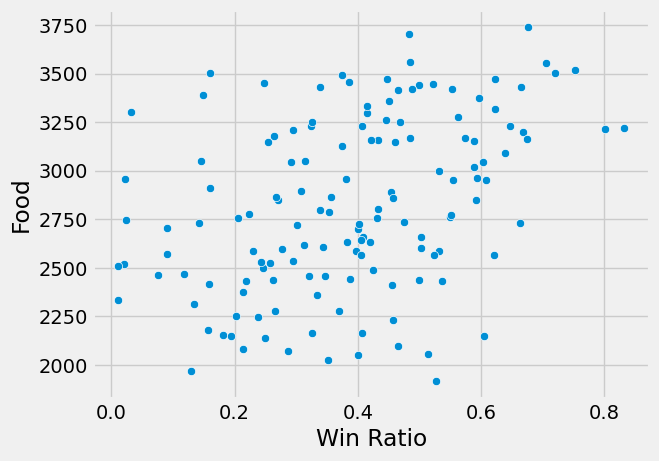

In [188]:
sns.scatterplot(food_happy_wins, x='Win Ratio', y='Food')

<AxesSubplot: xlabel='Happiness', ylabel='Food'>

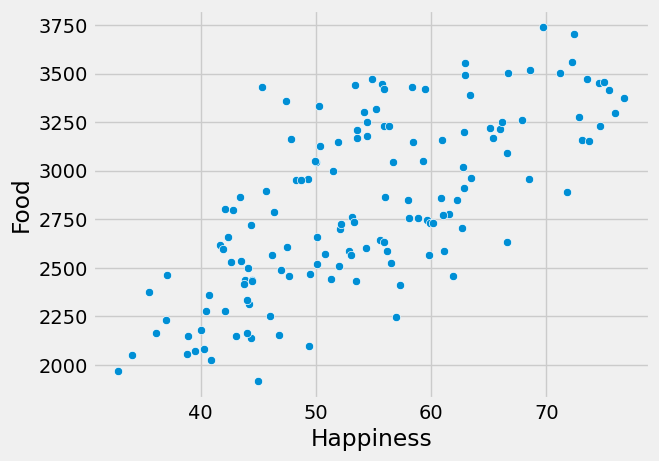

In [189]:
sns.scatterplot(food_happy_wins, x='Happiness', y='Food')

In [202]:
graph_data = food_happy_wins[food_happy_wins['Country'].isin(com_10['country'].values)]
graph_data = graph_data.merge(com_10, left_on='Country', right_on='country').drop(['country', 'food'], axis=1)
grouped_graph_data = graph_data.groupby('Category')['Win Ratio'].mean().reset_index()
grouped_graph_data

,Category,Win Ratio
0,Less Fed,0.348937
1,More Fed,0.568935


<AxesSubplot: xlabel='Category', ylabel='Win Ratio'>

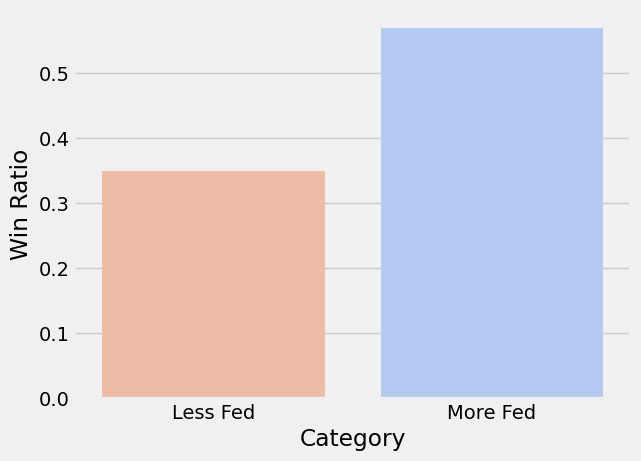

In [208]:
sns.barplot(grouped_graph_data, x='Category', y='Win Ratio', palette='coolwarm_r')